In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2

In [4]:
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
flat=lena.flatten()

# 1 Frequency Domain

## 1.1 Fourier Transform

### 1.1.1 For each filter given below, compute its Fourier transform, and illustrate its magnitude and phase response. For each filter, if it is separable, compute the FT separately. If not, compute the FT directly. (Test on grayscale Lena Image)

In [182]:
def pad(f,p,q):
  m,n = f.shape
  fp = np.zeros((p,q))
  fp[0:m,0:n]=f
  return fp

In [195]:
def DFT(f, h):
  m,n = f.shape
  p=2*m
  q=2*n

  plt.imshow(f, "gray"), plt.title("f")
  plt.show()  
  fp = pad(f,p,q)
  plt.imshow(fp, "gray"), plt.title("padded f")
  plt.show()  
  F = np.fft.fftshift(np.fft.fft2(fp))
  plt.imshow(np.log(1+np.abs(F)), "gray"), plt.title("Magnitude Spectrum of F") 
  plt.show()
  hp= pad(h,p,q)
  H = np.fft.fftshift(np.fft.fft2(hp))
  plt.imshow(np.log(1+np.abs(H)), "gray"), plt.title("Magnitude Spectrum of H")
  plt.show()

  return F, H

In [169]:
def apply_filter(F,H):
  G = F*H
  plt.imshow(np.log(1+np.abs(G)), "gray"), plt.title("Magnitude Spectrum of  G = F*H")  
  plt.show()
  Gp = np.fft.ifftshift(G)
  plt.imshow(np.log(1+np.abs(Gp)), "gray"), plt.title("Decentralized IFFT")
  plt.show()
  g = np.fft.ifft2(Gp)
  plt.imshow(np.abs(g[0:512 , 0:512]), "gray"), plt.title("Reversed Image") 
  plt.show()

  return g

***

#### filter 1

In [197]:
f1 = np.array(([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))

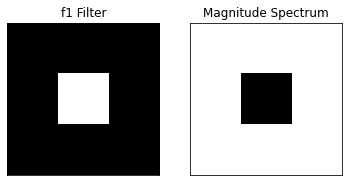

In [205]:
fft_f1 = np.fft.fft2(f1)

fft_shift_f1 = np.fft.fftshift(fft_f1)

mag_spectrum_f1 = np.log(np.abs(fft_shift_f1)+1)

plt.subplot(1,2,1),plt.imshow(f1,cmap = 'gray')
plt.title('f1 Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(mag_spectrum_f1,cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

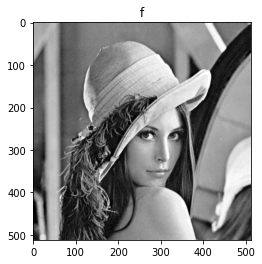

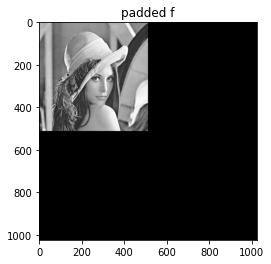

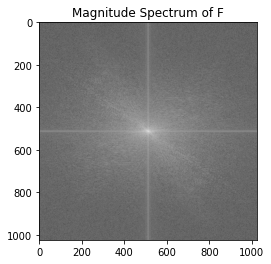

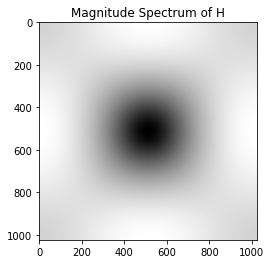

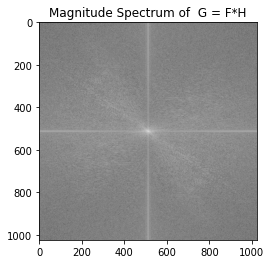

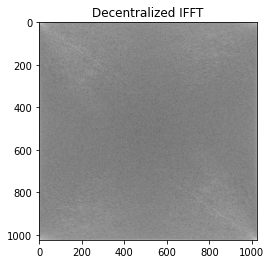

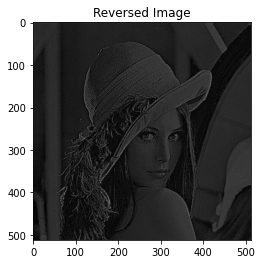

In [206]:
F1, H1 = DFT(lena, f1)
g1 = apply_filter(F1,H1)

#### filter 2
seperable filter 

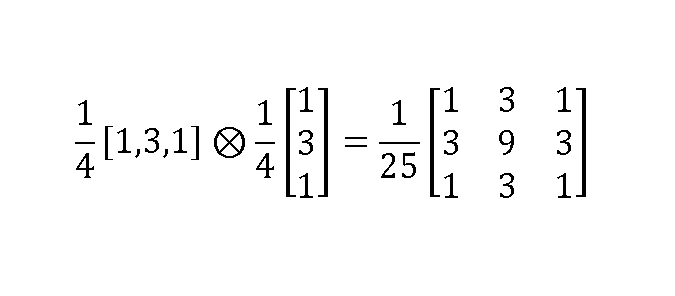

In [23]:
f2 = np.array(([[1, 3, 1], [3, 9, 3], [1, 3, 1]]))/25

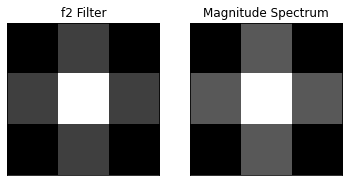

In [24]:
fft_f2 = np.fft.fft2(f2)

fft_shift_f2 = np.fft.fftshift(fft_f2)

mag_spectrum_f2 = np.log(np.abs(fft_shift_f2)+1)

plt.subplot(1,2,1),plt.imshow(f2,cmap = 'gray')
plt.title('f2 Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(mag_spectrum_f2,cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
f21 = np.array([[1,3,1]])
f21.shape

(1, 3)

In [26]:
f22 = f21.T
f22.shape

(3, 1)

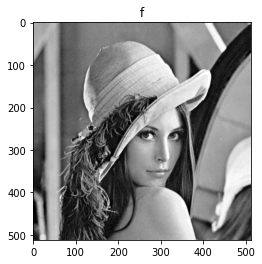

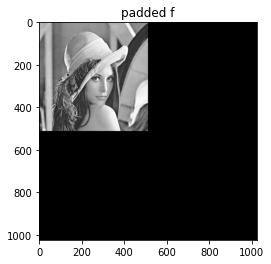

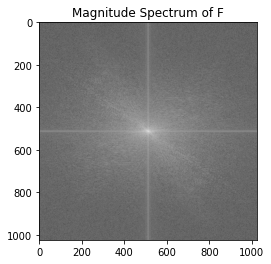

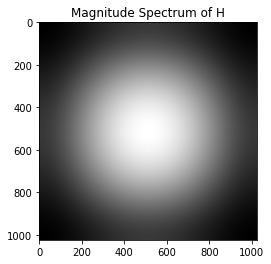

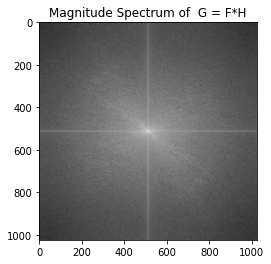

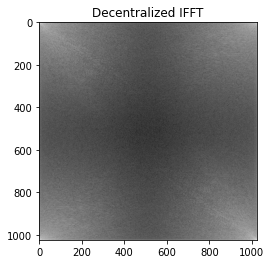

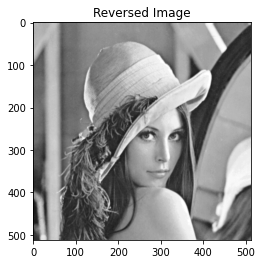

In [27]:
F2, H2 = DFT(lena, f2)
g2 = apply_filter(F2,H2)

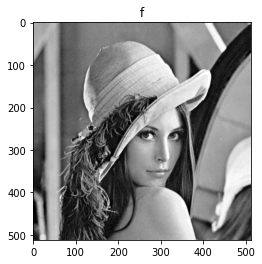

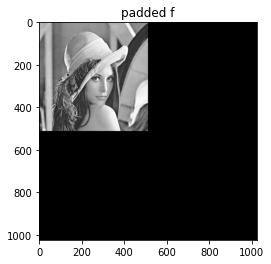

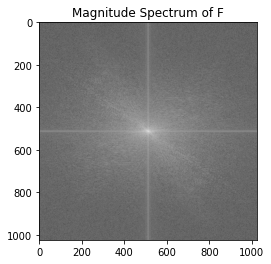

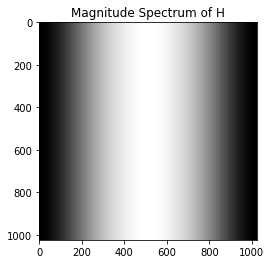

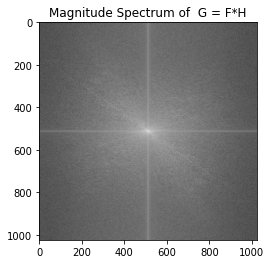

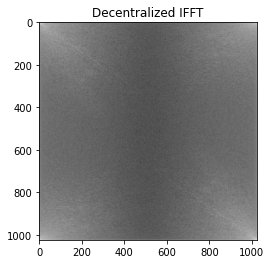

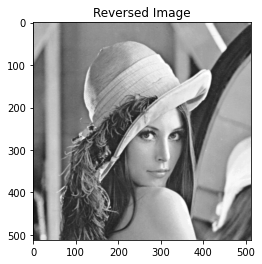

In [19]:
F21, H21 = DFT(lena, f21)
g21 = apply_filter(F21,H21) 

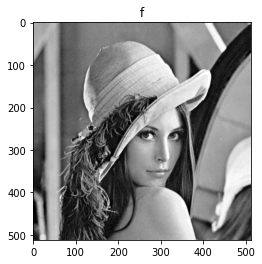

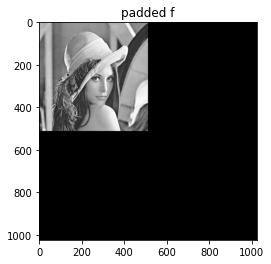

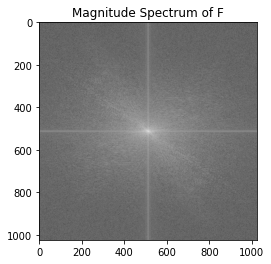

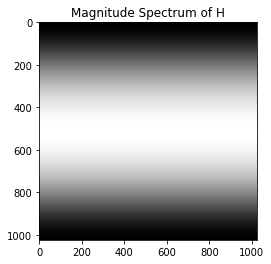

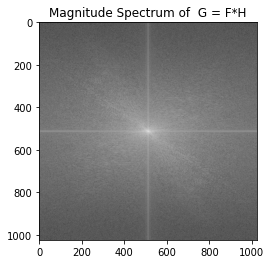

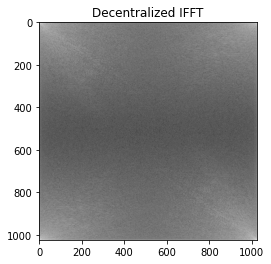

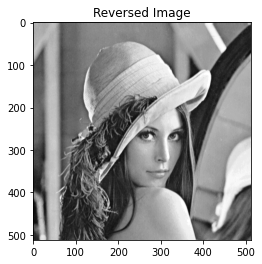

In [20]:
F22, H22 = DFT(lena, f22)
g22 = apply_filter(F22,H22)

#### filter 3

In [21]:
f3 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

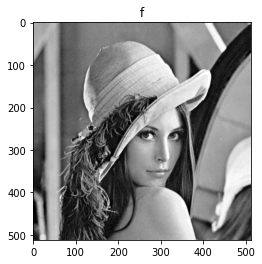

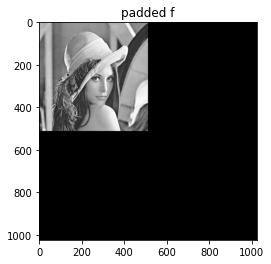

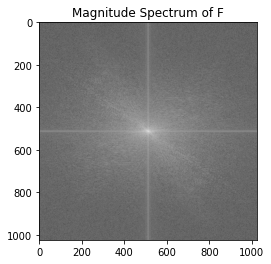

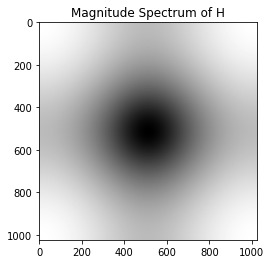

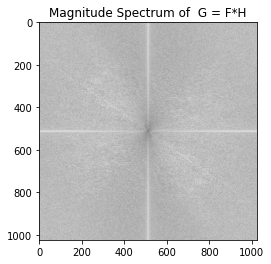

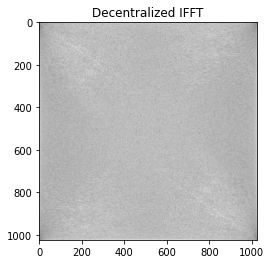

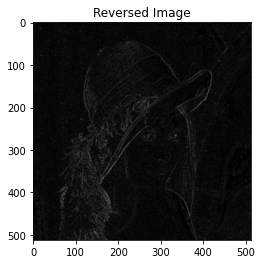

In [22]:
F3, H3 = DFT(lena, f3)
g3 = apply_filter(F3,H3)

***

#### filter 4

In [28]:
f4 = np.array([[-1, 0, 1], [0, 0, 0], [1, 2, 1]])

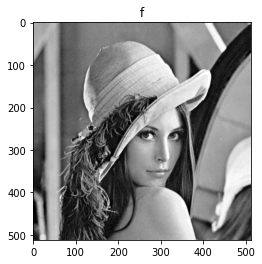

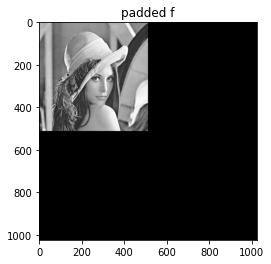

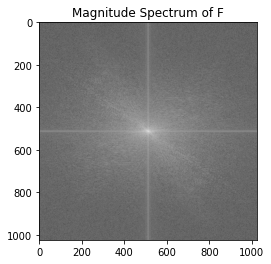

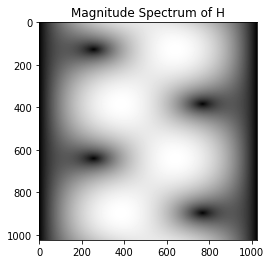

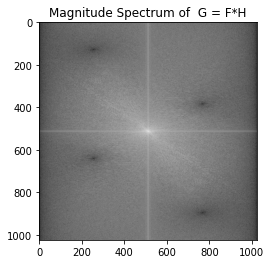

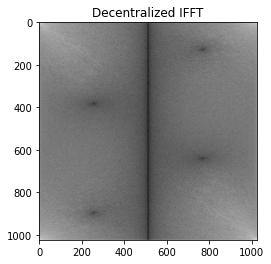

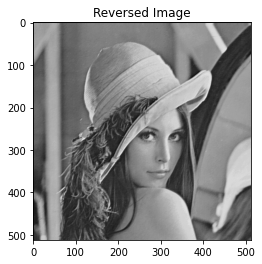

In [29]:
F4, H4 = DFT(lena, f4)
g4 = apply_filter(F4,H4)

***

### 1.1.2. Perform 2D DFT on grayscale Lena, Barbara, and Baboon images. Display the magnitude of the DFT image with and without shifting and with and without logarithmic. Display and discuss the results.

In [143]:
def pad(f,p,q):
  m,n = f.shape
  fp = np.zeros((p,q))
  fp[0:m,0:n]=f
  return fp

In [144]:
def DFT_result(f):
  m,n = f.shape
  p=2*m
  q=2*n

  plt.imshow(f, "gray"), plt.title("f")
  plt.show()  
  fp = pad(f,p,q)
  plt.imshow(fp, "gray"), plt.title("padded f")
  plt.show() 

  F_unshifted = np.fft.fft2(fp)
  F_shifted = np.fft.fftshift(np.fft.fft2(fp))

  plt.imshow(np.log(1+np.abs(F_shifted)), "gray"), plt.title("Mag with shifting and logarithmic") 
  plt.show()
  plt.imshow(1+np.abs(F_shifted), "gray"), plt.title("Mag with shifting and without logarithmic") 
  plt.show()
  plt.imshow(np.log(1+np.abs(F_unshifted)), "gray"), plt.title("Mag without shifting and with logarithmic") 
  plt.show()
  plt.imshow(1+np.abs(F_unshifted), "gray"), plt.title("Mag without shifting and without logarithmic") 
  plt.show()

  return F_shifted

##### Lena 

In [145]:
lena = cv2.imread('Lena.bmp', cv2.IMREAD_GRAYSCALE)

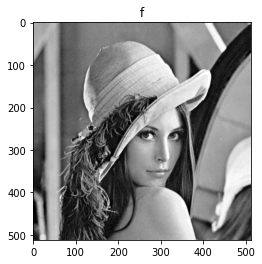

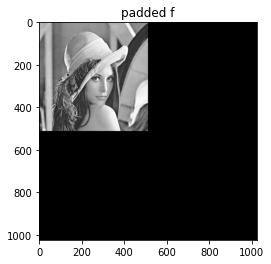

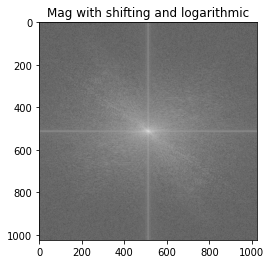

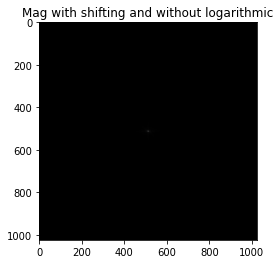

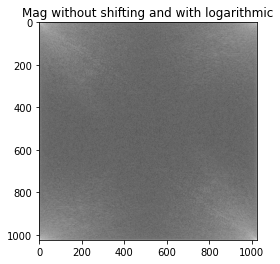

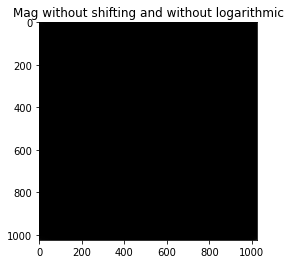

In [146]:
F_lena = DFT_result(lena)

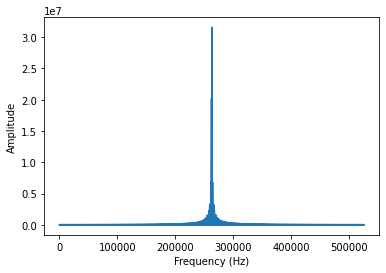

In [147]:
s_magnitude = np.abs(F_lena).flatten()
frequency = np.linspace(0, np.argmax(F_lena), len(s_magnitude))
frequency_bins = int(len(s_magnitude))
plt.plot(frequency[:frequency_bins], s_magnitude[:frequency_bins] )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()  

##### Barbara

In [38]:
barbara = cv2.imread('Barbara.bmp', cv2.IMREAD_GRAYSCALE)

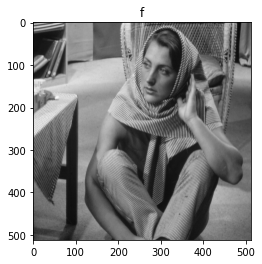

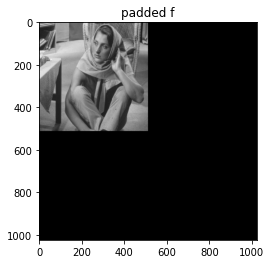

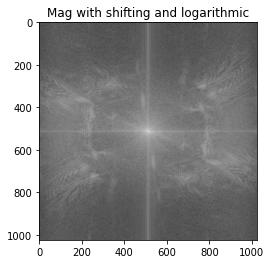

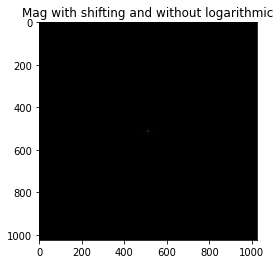

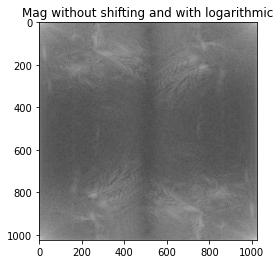

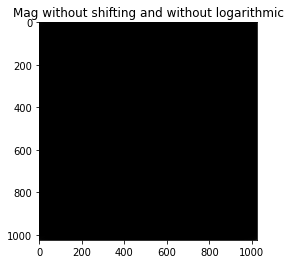

In [149]:
F_barb = DFT_result(barbara)

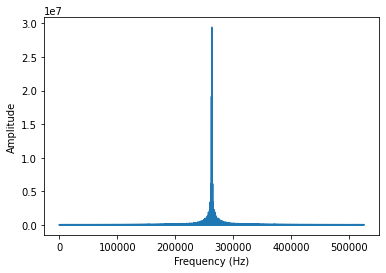

In [150]:
s_magnitude = np.abs(F_barb).flatten()
frequency = np.linspace(0, np.argmax(F_barb), len(s_magnitude))
frequency_bins = int(len(s_magnitude))
plt.plot(frequency[:frequency_bins], s_magnitude[:frequency_bins] )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

##### Baboon 

In [153]:
baboon = cv2.imread('Baboon.bmp', cv2.IMREAD_GRAYSCALE)

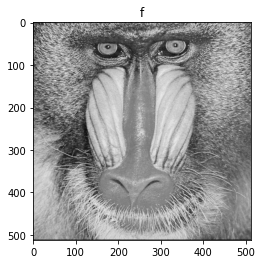

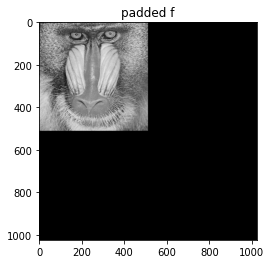

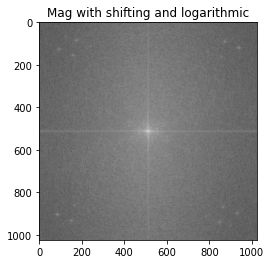

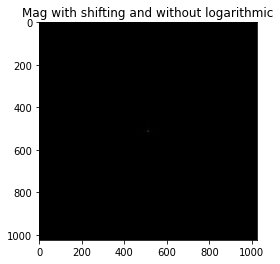

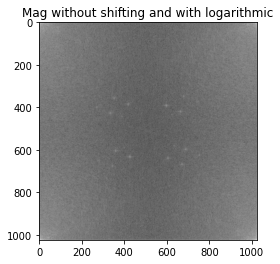

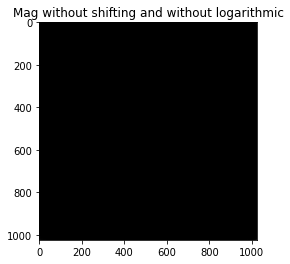

In [154]:
F_bab = DFT_result(baboon)

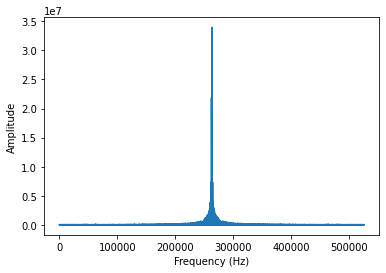

In [167]:
s_magnitude = np.abs(F_bab).flatten()
frequency = np.linspace(0, np.argmax(F_bab), len(s_magnitude))
frequency_bins = int(len(s_magnitude))
plt.plot(frequency[:frequency_bins], s_magnitude[:frequency_bins] )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

The result shows that the image contains components of all frequencies, but that their magnitude gets smaller for higher frequencies. Hence, low frequencies contain more image information than the higher ones. The transform image also tells us that there are two dominating directions in the Fourier image, one passing vertically and one horizontally through the center. These originate from the regular patterns in the background of the original image.

## 1.2. Filtering


### 1.2.1. Write a program that filters grayscale Barbara image by zeroing out certain DFT coefficients and also display and compare the original and processed images.

In [4]:
barbara = cv2.imread('Barbara.bmp', cv2.IMREAD_GRAYSCALE)

In [5]:
m,n = barbara.shape
fft = np.fft.fft2(barbara)

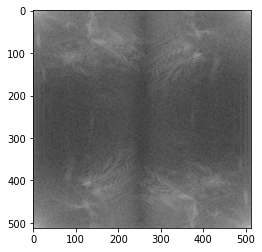

In [6]:
plt.imshow(np.log(1+np.abs(fft)),'gray')

#### filter a 

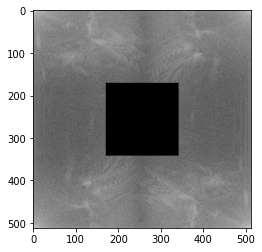

In [9]:
t=1/2

ffta1 = fft
for k in range(m):
    for l in range(n):
      if ((t*n) < k and (t*n) < l and k < ((1-t)*n) and l < ((1-t)*n)):
        ffta1[k, l] = 0

plt.imshow(np.log(1+np.abs(ffta1)),'gray')
plt.show()

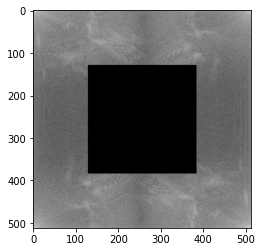

In [49]:
t=1/4

ffta1 = fft
for k in range(m):
    for l in range(n):
      if ((t*n) < k and (t*n) < l and k < ((1-t)*n) and l < ((1-t)*n)):
        ffta1[k, l] = 0

plt.imshow(np.log(1+np.abs(ffta1)),'gray')
plt.show()

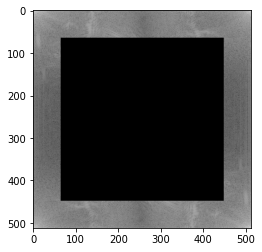

In [50]:
t=1/8

ffta2 = fft
for k in range(m):
    for l in range(n):
      if ((t*n) < k and (t*n) < l and k < ((1-t)*n) and l < ((1-t)*n)):
        ffta2[k, l] = 0

plt.imshow(np.log(1+np.abs(ffta2)),'gray')
plt.show()

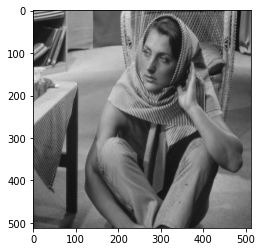

In [51]:
ga1 = np.abs(np.fft.ifft2(ffta1))
plt.imshow((ga1),'gray')
plt.show()

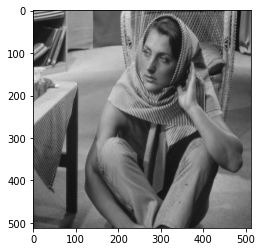

In [52]:
ga2 = np.abs(np.fft.ifft2(ffta2))
plt.imshow((ga2),'gray')
plt.show()

#### filter b

In [48]:
barbara = cv2.imread('Barbara.bmp', cv2.IMREAD_GRAYSCALE)

In [49]:
m,n = barbara.shape
fft = np.fft.fft2(barbara)

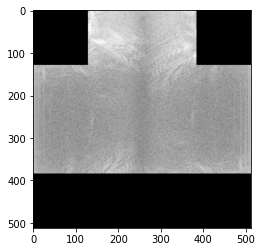

In [207]:
t=1/4

fftb1 = fft.copy()  # Create a copy of the Fourier spectrum
for k in range(m):
    for l in range(n):
      if (0 <= k and 0 <= l and k <= (t*m) and l <= (t*n)):
        fftb1[k, l] = 0
      elif (0 <= k and k <= (t*m) and ((1 -t)*n) <= l and l <= (n-1)):
        fftb1[k, l] = 0
      elif (((1 -t)*m) <= k and k <= (m-1) and 0 <= l and l <= (t*n)):
        fftb1[k, l] = 0
      elif (((1 -t)*m) <= k and l <= (n-1)):
        fftb1[k, l] = 0

plt.imshow(np.log(1+np.abs(fftb1)),'gray')
plt.show()

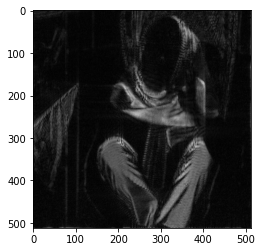

In [51]:
gb1 = np.abs(np.fft.ifft2(fftb1))
plt.imshow((gb1/2),'gray')
plt.show()

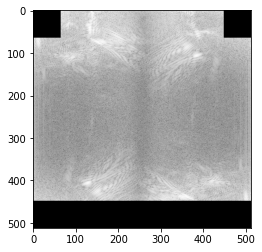

In [217]:
t=1/8

fftb2 = fft.copy()  # Create a copy of the Fourier spectrum
for k in range(m):
    for l in range(n):
      if (0 <= k and 0 <= l and k <= (t*m) and l <= (t*n)):
        fftb2[k, l] = 0
      elif (0 <= k and k <= (t*m) and ((1 -t)*n) <= l and l <= (n-1)):
        fftb2[k, l] = 0
      elif (((1 -t)*m) <= k and k <= (m-1) and 0 <= l and l <= (t*n)):
        fftb2[k, l] = 0
      elif (((1 -t)*m) <= k and l <= (n-1)):
        fftb2[k, l] = 0

plt.imshow(np.log(1+np.abs(fftb2)),'gray')

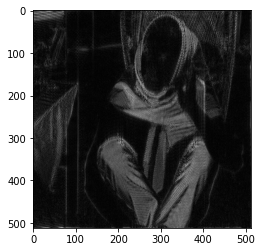

In [53]:
gb2 = np.abs(np.fft.ifft2(fftb2))
plt.imshow((gb2/4),'gray')
plt.show()

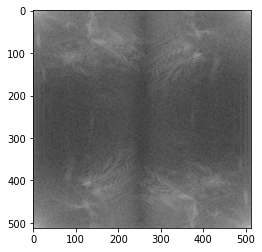

In [223]:
t = 1/2
fftb3 = fft.copy()  

for k in range(m):
    for l in range(n):
        if (0 <= k <= t*m and 0 <= l <= t*n) or \
           (0 <= k <= t*m and (1-t)*n <= l <= n-1) or \
           ((1-t)*m <= k <= m-1 and 0 <= l <= t*n) or \
           ((1-t)*m <= k <= m-1 and 0 <= l <= n-1):
            fftb1[k, l] = 0
filtered_image = np.fft.ifft2(fftb3)

plt.imshow(np.log(1 + np.abs(fftb3)), 'gray')


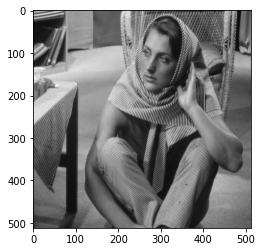

In [224]:
gb3 = np.abs(np.fft.ifft2(fftb3))
plt.imshow((gb3),'gray')
plt.show()

# 2. Wavelet

## 2.1. Pyramid

### 2.1.1. For the Barbara image, build a 5 level Gaussian and Laplacian pyramid and display them in the pyramid format.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from math import floor, ceil, sqrt
import pywt

In [70]:
def imshow(*args, figsize=10, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap='gray')
        plt.axis('off')
    plt.show()

In [238]:
def gaussian_pyramid(img, num_levels):
  lower = img.copy()
  gaussian_pyr = [lower]
  for i in range(num_levels):

    lower = cv2.pyrDown(lower)
    gaussian_pyr.append(np.float32(lower))
  return gaussian_pyr

In [248]:
def laplacian_pyramid(gaussian_pyr):
    laplacian_top = gaussian_pyr[-1]
    num_levels = len(gaussian_pyr) - 1
    
    laplacian_pyr = [laplacian_top]
    for i in range(num_levels,0,-1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        laplacian = np.subtract(gaussian_pyr[i-1], gaussian_expanded)
        laplacian_pyr.append(laplacian)
    return laplacian_pyr

In [62]:
barbara = cv2.imread('Barbara.bmp', cv2.IMREAD_GRAYSCALE)

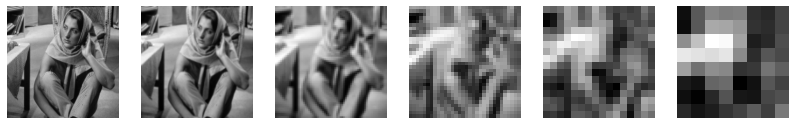

In [73]:
barbara = cv2.resize(barbara, (256, 256)) 

g_pyramid = gaussian_pyramid(barbara, 5)
imshow(g_pyramid, figsize=14)

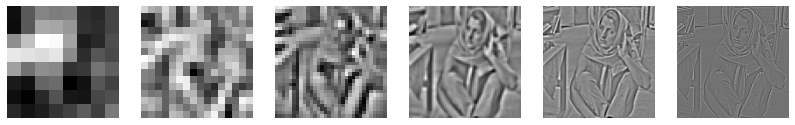

In [75]:
l_pyramid = laplacian_pyramid(g_pyramid)
imshow(l_pyramid, figsize=14)

***

### 2.1.2. For the grayscale Lena image, manually compute a 3-level approximation pyramid and corresponding prediction residual pyramid. Use 3x3 averaging for the approximation and use pixel replication for the interpolation filters.

In [62]:
lena = cv2.imread('Lena.bmp', cv2.IMREAD_GRAYSCALE)

In [84]:
def down_sample_avg(im):
    original_width = im.shape[1]
    original_height = im.shape[0]
    width = original_width // 2
    height = original_height // 2
    resized_image = np.zeros(shape=(height, width), dtype=np.uint8)
    scale = 2
    for i in range(height):
        for j in range(width):
            temp = 0
            for x in range(scale):
                for y in range(scale):
                    temp += im[i*scale + x, j*scale + y]
            resized_image[i, j] = temp/(scale*scale)

    return resized_image

In [249]:
def nearest(input):
  sx,sy = input.shape
  output = np.zeros((sx*3, sy*3), input.dtype)
  for y in range(len(output)):
    for x in range(len(output[y])):
      proj_x = x // 3
      proj_y = y // 3
      output[y][x] = input[proj_y][proj_x]

  return output

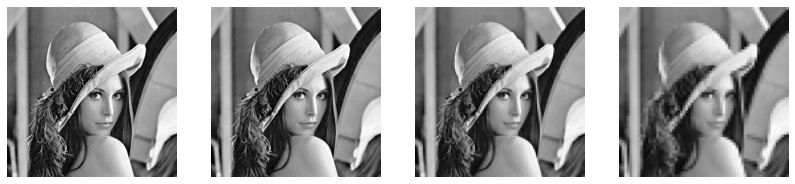

In [88]:
# approximation pyramid 3*3 averaging
G = lena.copy()
gpA = [G]
for i in range(3):
    G = down_sample_avg(G)
    gpA.append(G)

imshow(gpA, figsize=14)

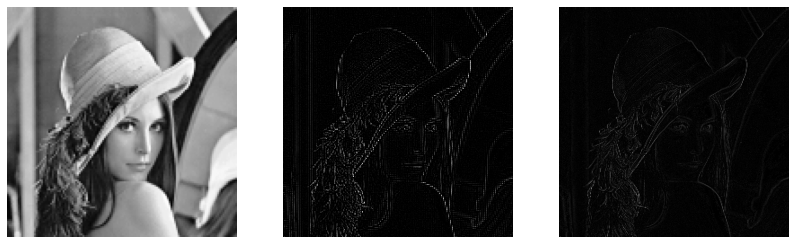

In [80]:
# prediction residual pyramid pixel replication for the interpolation filter
lpA = [gpA[2]]
for i in range(2,0,-1):
    GE = nearest(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

imshow(lpA, figsize=14)

***

### 2.1.3. For the grayscale Lena Image, compute the wavelet transform (with 5-level) using the Haar analysis filters.

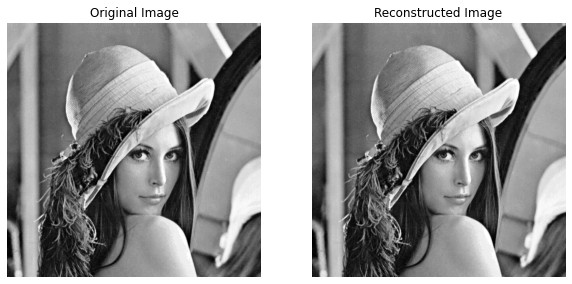

In [89]:
# wavelet transform
cA, (cH, cV, cD) = pywt.dwt2(lena, 'haar', mode='periodization')

# inverse wavelet transform
coefficients = [cA, (cH, cV, cD)]
img_i = pywt.idwt2(coefficients, 'haar', mode='periodization')
img_i = img_i.astype('uint8')

imshow(lena, img_i, figsize=(10), title=['Original Image', 'Reconstructed Image'])

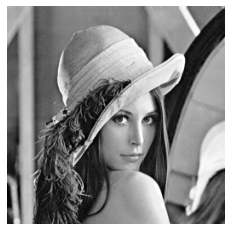

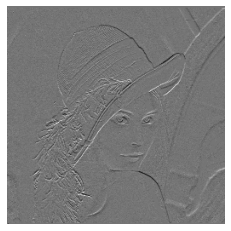

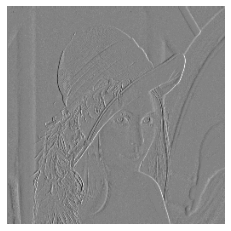

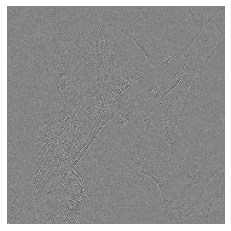

In [90]:
cA, (cH, cV, cD) = pywt.dwt2(lena, 'haar', mode='periodization')

plt.imshow(cA, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(cH, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(cV, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(cD, cmap='gray')
plt.axis('off')
plt.show()

### 2.1.4. Quantize all the wavelet coefficients (whole sub-bands) created in Prob. 2.1.3 by a step size of 𝛾 = 2. Then reconstruct the image from the quantized wavelet coefficients using Haar synthesis filter and Report PSNR values.
𝑐 ′ (𝑢, 𝑣) = 𝛾 × 𝑠𝑔𝑛[𝑐(𝑢, 𝑣)] × 𝑓𝑙𝑜𝑜𝑟 [ |𝑐(𝑢, 𝑣)| 𝛾 ]
(𝑐 represents the wavelet coefficient)

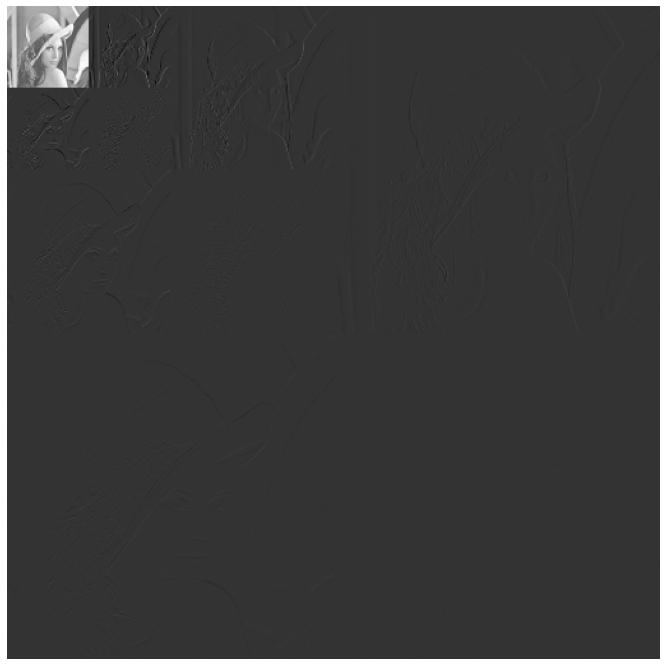

In [84]:
coeffs = pywt.wavedec2(lena, 'haar', mode='periodization', level=3)
q_coeffs = coeffs

c_matrix, c_slices = pywt.coeffs_to_array(coeffs)
plt.figure(figsize=(12, 12))
plt.imshow(c_matrix, cmap='gray')
plt.axis('off')
plt.show()

In [79]:
cH1, cV1, cD1 = coeffs[-1]

In [96]:
for i in range(256):
  for j in range(256):
    cH = cH1[i][j] 
    cH1[i][j] = np.round(abs(cH) / 2) * np.sign(cH) * 2

    cV = cV1[i][j]
    cV1[i][j] = np.round(abs(cV) / 2) * np.sign(cV) * 2

    cD = cD1[i][j]
    cD1[i][j] = np.round(abs(cD) / 2) * np.sign(cD) * 2

In [66]:
cH2, cV2, cD2 = coeffs[-2]

In [111]:
for i in range(128):
  for j in range(128):
    cH = cH2[i][j] 
    cH2[i][j] = np.round(abs(cH) / 2) * np.sign(cH) * 2

    cV = cV2[i][j]
    cV2[i][j] = np.round(abs(cV) / 2) * np.sign(cV) * 2

    cD = cD2[i][j]
    cD2[i][j] = np.round(abs(cD) / 2) * np.sign(cD) * 2

In [98]:
cH3, cV3, cD3 = coeffs[-3]

In [70]:
cA3 = coeffs[0]

In [114]:
for i in range(64):
  for j in range(64):
    cH = cH3[i][j] 
    cH3[i][j] = np.round(abs(cH) / 2) * np.sign(cH) * 2

    cV = cV3[i][j]
    cV3[i][j] = np.round(abs(cV) / 2) * np.sign(cV) * 2

    cD = cD3[i][j]
    cD3[i][j] = np.round(abs(cD) / 2) * np.sign(cD) * 2

    cA = cA3[i][j]
    cA3[i][j] = np.round(abs(cA) / 2) * np.sign(cA) * 2

In [118]:
q_coeffs[-1] = cH1, cV1, cD1 

q_coeffs[-2] = cH2, cV2, cD2 

q_coeffs[-3] = cH3, cV3, cD3 

q_coeffs[0] = cA3 

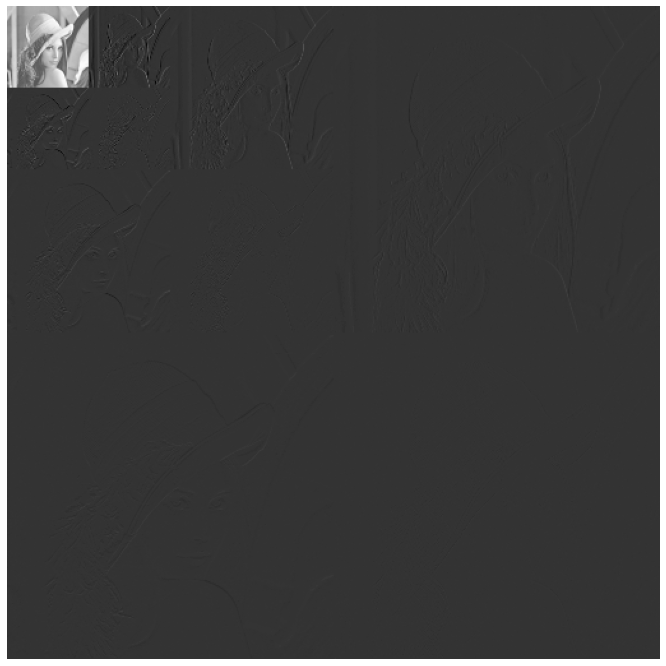

In [131]:
a,_ = pywt.coeffs_to_array(q_coeffs)
plt.figure(figsize=(12, 12))
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()

In [133]:
recon = pywt.waverec2(q_coeffs,'haar')

In [136]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / sqrt(mse))
    return psnr

In [137]:
psnr = PSNR(lena, recon)

In [138]:
psnr

52.771172748328546